# About

This notebook is a basic example for looking at individual events, events, creating a solution and submitting it. It walks through some of the library function for accessing the data and writing a submission file. 
This example uses DBScan to solve the tracking problem. 

In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade pip
#!{sys.executable} -m pip install --user git+https://github.com/LAL/trackml-library.gitl-library.git

import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from trackml.dataset import load_event, load_dataset
from trackml.score import score_event

# Change this according to your directory preferred setting
path_to_train = "input/"
# This event is in Train_1
event_prefix = "event000001042"

hits, cells, particles, truth = load_event(os.path.join(path_to_train, event_prefix))
hits.head()

print(hits)

data = [(74.5791, 18.7019, -1498.0), (64.5581, 16.3475, -1298.0), (54.6152, 13.909, -1098.0), (54.7899, 13.9544, -1102.0), (47.6258, 12.1795, -958.0), (47.8209, 12.2584, -962.0), (40.8605, 10.5133, -822.5), (40.6364, 10.4501, -818.0), (40.8193, 10.4947, -822.0), (34.8866, 8.98988, -702.5), (34.6862, 8.97018, -698.0), (34.8622, 9.00137, -702.0), (-147.462, 62.8427, -698.0), (29.9064, 7.7453, -602.5), (29.6804, 7.66555, -598.0), (29.898, 7.75694, -602.0), (-127.871, 49.9292, -598.0), (-128.682, 50.4098, -602.0), (-31.5864, 7.07015, -141.2), (-31.0981, 6.93529, -139.0), (-31.9055, -5.50469, -63.056), (-3.57057, -31.7838, -25.4438), (16.5893, -28.0009, -29.4773), (29.0088, 13.7897, 0.746876), (32.925, 2.58876, -11.5666), (32.6593, 3.34871, 0.128124), (30.0839, 14.2573, 0.803123), (1.47582, 34.3461, -59.9671), (-30.3159, -8.55085, 17.4089), (-19.5865, -25.4608, 16.865), (31.1501, -6.0144, 3.90648), (28.5514, 13.5977, 0.715626), (32.1525, 3.29815, 0.103951), (29.606, 14.0491, 0.771873), (-2.03589, 31.6042, 14.4076), (-2.08934, 32.5751, 14.8907), (7.68493, -31.1432, 135.814), (31.8255, -2.83178, 113.019), (-21.1411, -23.5261, 174.417), (-21.8604, -24.3651, 180.542), (17.5965, -27.1013, 270.624), (-16.4771, -26.9592, 289.262), (-69.3461, 19.6434, -313.023), (-70.0024, -12.808, -137.19), (5.97047, 71.36, -123.526), (-7.51706, -71.9203, -56.0689), (37.3427, -61.3198, -63.551), (72.152, 6.05238, -23.9389), (-69.834, -18.2994, 41.3285), (-44.5631, -56.0451, 39.1781), (69.716, -14.0517, 10.1656), (71.7163, -14.4825, 10.4887), (71.4738, 6.74731, 1.67188), (65.2158, 28.2501, 3.07812), (66.906, 28.8557, 3.19062), (-5.308, 71.8232, 34.1962), (71.6982, -2.209, 255.62), (16.6993, -70.5766, 308.678), (-113.438, -22.1132, -222.173), (14.8566, 114.597, -198.455), (15.3452, 116.702, -201.97), (-11.1975, -115.874, -89.5369), (61.2978, -97.9029, -101.341), (115.369, 10.3137, -37.5852), (-111.846, -26.8988, 66.4089), (-113.899, -27.2742, 67.6278), (-73.9016, -89.6604, 64.318), (113.723, -24.042, 17.3314), (114.955, 9.86314, 3.35938), (107.074, 41.693, 5.66563), (108.899, 42.2025, 5.77813), (-9.66327, 114.996, 55.4422), (116.718, 3.67305, 418.795), (25.3324, -112.367, 490.441), (32.5092, 169.916, -297.225), (93.5895, -144.287, -150.24), (-14.801, -171.251, -131.698), (172.103, 16.6093, -55.5266), (168.085, -37.51, 26.2531), (170.565, 12.6533, 5.53385), (172.625, 12.7341, 5.60938), (162.293, 53.7447, 8.92812), (164.338, 54.0822, 9.04751), (-168.287, -35.8105, 99.624), (-112.526, -130.055, 95.7036), (-16.551, 171.088, 83.1214), (-36.2281, -54.1584, 598.0), (-36.5159, -54.4689, 602.0), (29.9758, -137.168, 598.0), (38.632, -59.836, 598.0), (164.574, 16.7005, 598.0), (-33.9642, 1.51487, 702.5), (-43.2576, -62.3888, 698.0), (-43.5496, -62.6932, 702.0), (34.076, -160.279, 698.0), (45.0206, -69.8784, 698.0), (-33.9371, 1.48858, 702.0), (-33.7288, 1.47588, 697.5), (-39.7507, 1.91209, 822.5), (-51.9625, -72.042, 818.0), (-52.2723, -72.3462, 822.0), (52.6864, -81.9094, 818.0), (-39.7378, 1.90422, 822.0), (-39.5086, 1.88061, 817.5), (-46.5023, 2.38382, 962.5), (-62.8269, -83.2079, 962.0), (61.8011, -96.4148, 962.0), (61.5499, -96.0007, 958.0), (-46.2499, 2.361, 957.5), (-53.2578, 2.9054, 1102.5), (-73.397, -93.2803, 1098.0), (-73.7204, -93.5954, 1102.0), (70.6713, -110.49, 1102.0), (70.4151, -110.092, 1098.0), (-53.027, 2.89437, 1097.5), (-89.3871, -107.527, 1298.0), (82.9998, -130.233, 1298.0), (-62.7204, 3.75757, 1297.5), (-106.085, -120.827, 1498.0), (-72.466, 4.67503, 1497.5), (-339.543, 526.156, -2948.5), (-328.019, 438.452, -2551.5), (-328.416, 437.912, -2545.5), (-315.014, 349.62, -2154.5), (-293.961, 269.244, -1801.5), (-267.869, 203.859, -1498.5), (-595.363, -203.088, -1215.5), (423.613, 499.792, -1218.5), (-232.783, 147.607, -1215.5), (-251.487, -58.841, -496.4), (71.3897, 250.076, -449.0), (-18.2218, -261.228, -200.2), (149.661, -217.461, -229.8), (258.238, 27.7524, -83.2), (254.038, -61.6298, 40.2), (260.243, 14.223, 9.0), (254.24, 61.4543, 13.8), (-259.4, -43.9909, 152.8), (-252.79, -43.6568, 149.2), (-175.053, -188.289, 143.8), (-30.3857, 258.426, 126.4), (-262.385, -44.1464, 154.4), (251.266, 61.4182, 945.8), (-345.633, -90.5301, -687.4), (134.975, 336.012, -633.0), (-18.6429, -358.241, -273.6), (211.855, -290.159, -313.2), (360.138, 43.4876, -115.6), (353.758, 42.3838, -113.2), (360.141, 11.8765, 12.6), (356.521, 53.5245, 18.6), (347.765, -92.1119, 56.8), (-363.175, -44.0939, 212.6), (-356.689, -44.3527, 208.2), (-259.997, -255.487, 204.2), (-255.332, -252.097, 201.4), (-50.525, 356.576, 175.4), (-477.982, -144.993, -963.2), (252.783, 433.151, -897.12), (247.391, 429.853, -886.2), (-12.8838, -499.553, -381.4), (314.379, -393.855, -439.0), (498.102, 69.2952, -159.8), (505.074, 0.476575, 18.6), (500.069, 10.8995, 28.2), (498.996, 1.15838, 17.4), (477.466, -141.625, 78.4), (-88.0956, 494.921, 245.0), (-499.166, -29.7837, 291.0), (-377.146, -330.46, 283.2), (-372.027, -327.627, 279.6), (434.783, -496.117, -575.4), (2.75194, -658.916, -502.8), (653.66, 104.398, -211.4), (656.895, -91.1926, 39.0), (660.821, -22.368, 23.4), (625.805, -209.947, 104.8), (-141.956, 646.558, 324.0), (-139.605, 640.643, 320.4), (-526.492, -401.218, 376.6), (-663.001, 10.4455, 388.0), (50.9648, -280.983, 1218.5), (50.7753, -279.628, 1215.5), (308.433, 109.917, 1215.5), (57.1368, -345.503, 1498.5), (360.011, 171.404, 1501.5), (360.357, 172.015, 1504.5), (61.9471, -415.697, 1801.5), (402.767, 244.127, 1804.5), (65.5342, -496.031, 2151.5), (135.713, -215.951, 2148.5), (438.221, 328.346, 2151.5), (437.357, 327.194, 2148.5), (-201.609, -178.88, 2548.5), (68.3465, -586.732, 2548.5), (160.423, -256.432, 2548.5), (469.558, 417.093, 2548.5), (-239.598, -197.623, 2945.5), (70.7678, -676.223, 2945.5), (70.7017, -676.266, 2948.5), (185.066, -296.957, 2948.5), (-846.07, -365.572, -1802.5), (737.893, 479.623, -1797.5), (738.652, 477.646, -1802.5), (-724.827, -278.868, -1497.5), (580.698, 514.765, -1494.5), (568.955, -589.855, -715.6), (28.9588, -822.146, -630.6), (804.935, 144.934, -260.4), (783.154, -257.786, 48.6), (779.439, -250.895, 48.6), (820.538, -57.7025, 27.0), (764.758, -285.949, 130.0), (781.457, -254.667, 54.4), (777.682, -247.652, 54.4), (-209.383, 797.291, 406.6), (-681.034, -450.247, 466.4), (-814.027, 72.603, 477.2), (753.581, -690.784, -900.0), (747.175, -687.798, -889.2), (74.4463, -1020.52, -786.2), (1000.24, 207.585, -325.2), (1013.01, -117.136, 37.8), (849.482, -565.409, 76.0), (850.036, -555.619, 76.0), (938.461, -399.67, 168.2), (-305.428, 970.799, 498.8), (-903.241, -482.321, 601.8), (-1001.89, 194.612, 612.6)]

#TOOD undo
import random
random.shuffle(data)
    
# plot initial



        hit_id            x           y       z  volume_id  layer_id  \
0            1   -84.372200   -6.815780 -1502.5          7         2   
1            2   -56.195900   -5.789530 -1502.5          7         2   
2            3   -73.321602   -8.303340 -1502.5          7         2   
3            4   -83.471802   -9.653880 -1502.5          7         2   
4            5   -85.350403  -12.259300 -1502.5          7         2   
5            6   -75.374298  -10.019700 -1502.5          7         2   
6            7   -63.210999   -2.542320 -1502.5          7         2   
7            8   -64.483200    0.717917 -1502.5          7         2   
8            9   -66.140602   -6.183390 -1502.5          7         2   
9           10   -56.641701   -4.282260 -1502.5          7         2   
10          11   -40.140999   -3.680930 -1502.5          7         2   
11          12   -93.665398   -0.575681 -1502.5          7         2   
12          13   -78.614998    1.762370 -1502.5          7      

## Identify tracks 

In this example the track pattern recognition is solved as clustering problem. Each of the clusters corresponds to one track. 
Firstly we preprocess hit coordinates in order to highlight the fact that a track is (approximatly) an arc of helix. 


$$ 
r_{1} = \sqrt{x^{2}+y^{2}+z^{2}}
$$

$$
x_{2} = x / r_{1}
$$
$$
y_{2} = y / r_{1}
$$

$$
r_{2} = \sqrt{x^{2}+y^{2}}
$$

$$
z_{2} = z / r_{2}
$$


In [17]:
rotors = []
# TODO
for x, y, z in data:
    magnitude = math.sqrt(x**2+ y**2)
    rotors.append((x/magnitude,y/magnitude,z/magnitude))


[-1000, 1000, -1000, 1000]

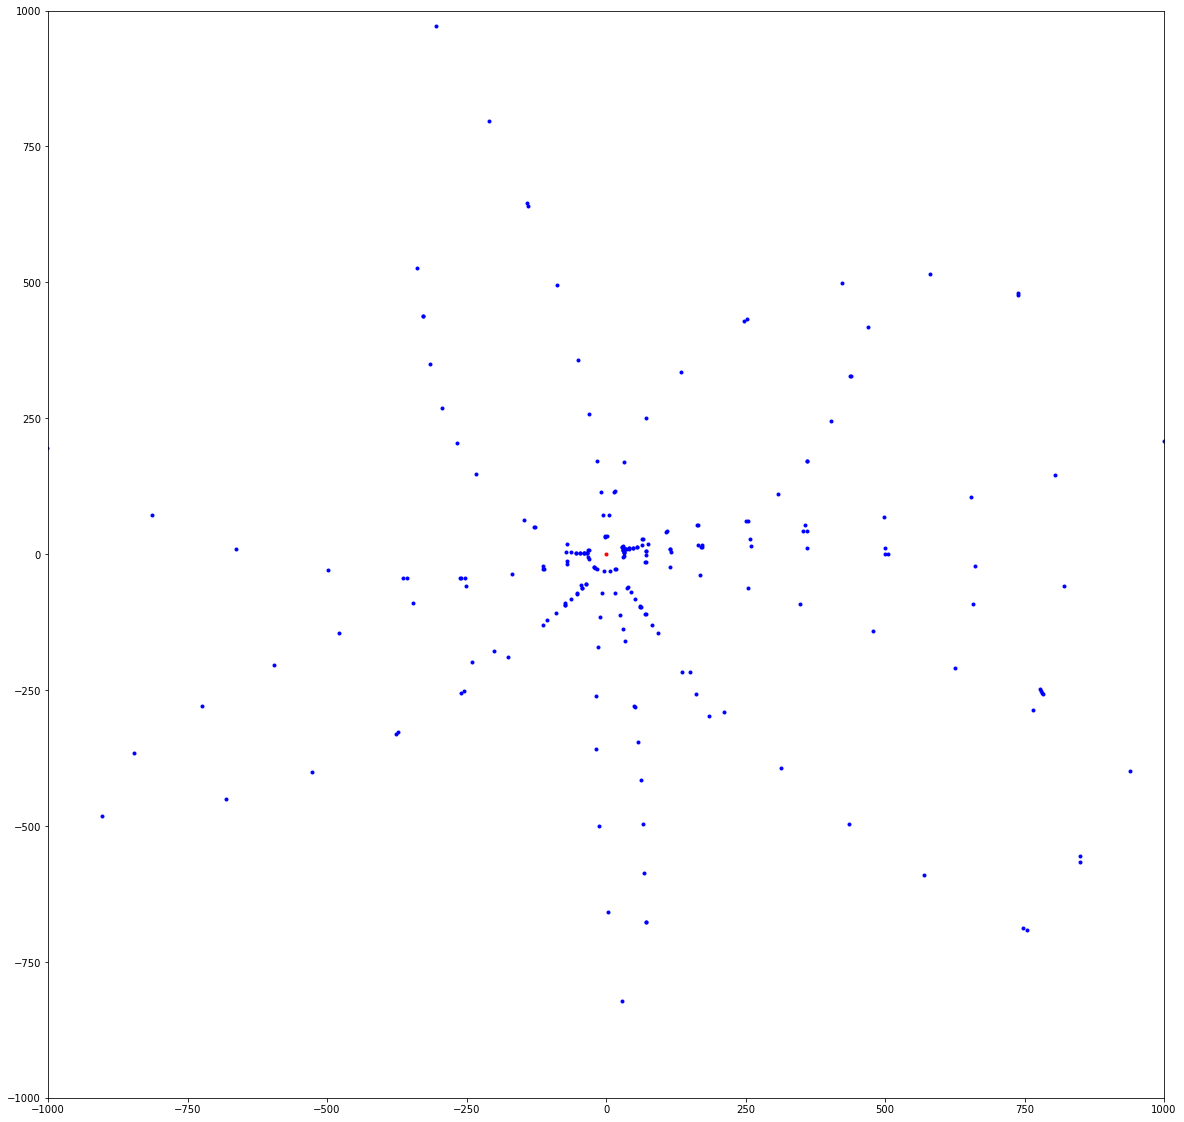

In [18]:
plt.figure(figsize = (20,20))
#plt.subplot(411)
plt.plot([i[0] for i in data], [i[1] for i in data], 'b.')
plt.plot([0], [0], 'r.')
for i in range(len(rotors)):
    size = math.sqrt(rotors[i][0]**2 + rotors[i][1]**2)*0.03
    #plt.arrow(data[i][0], data[i][1], rotors[i][0]/size, rotors[i][1]/size)
plt.axis([-1000,1000,-1000,1000])

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

class Clusterer(object):
    
    def __init__(self, eps):
        self.eps = eps
        
    
    def _preprocess(self, toScan):

        #ss = StandardScaler()
        #X = ss.fit_transform(toScan)
        X = toScan
        return X
    
    
    def scan(self, toScan):
        
        X = self._preprocess(toScan)
        
        #TODO: change min_samples (Determines how detailed the model is)
        #cl = hdbscan.HDBSCAN(min_cluster_size = 7, min_samples = 10)
        cl = DBSCAN(eps=self.eps, min_samples=2, algorithm='kd_tree')
        labels = cl.fit_predict(X)
        
        return labels

clusterer = Clusterer(eps = 0.005)

<Figure size 2000x2000 with 0 Axes>

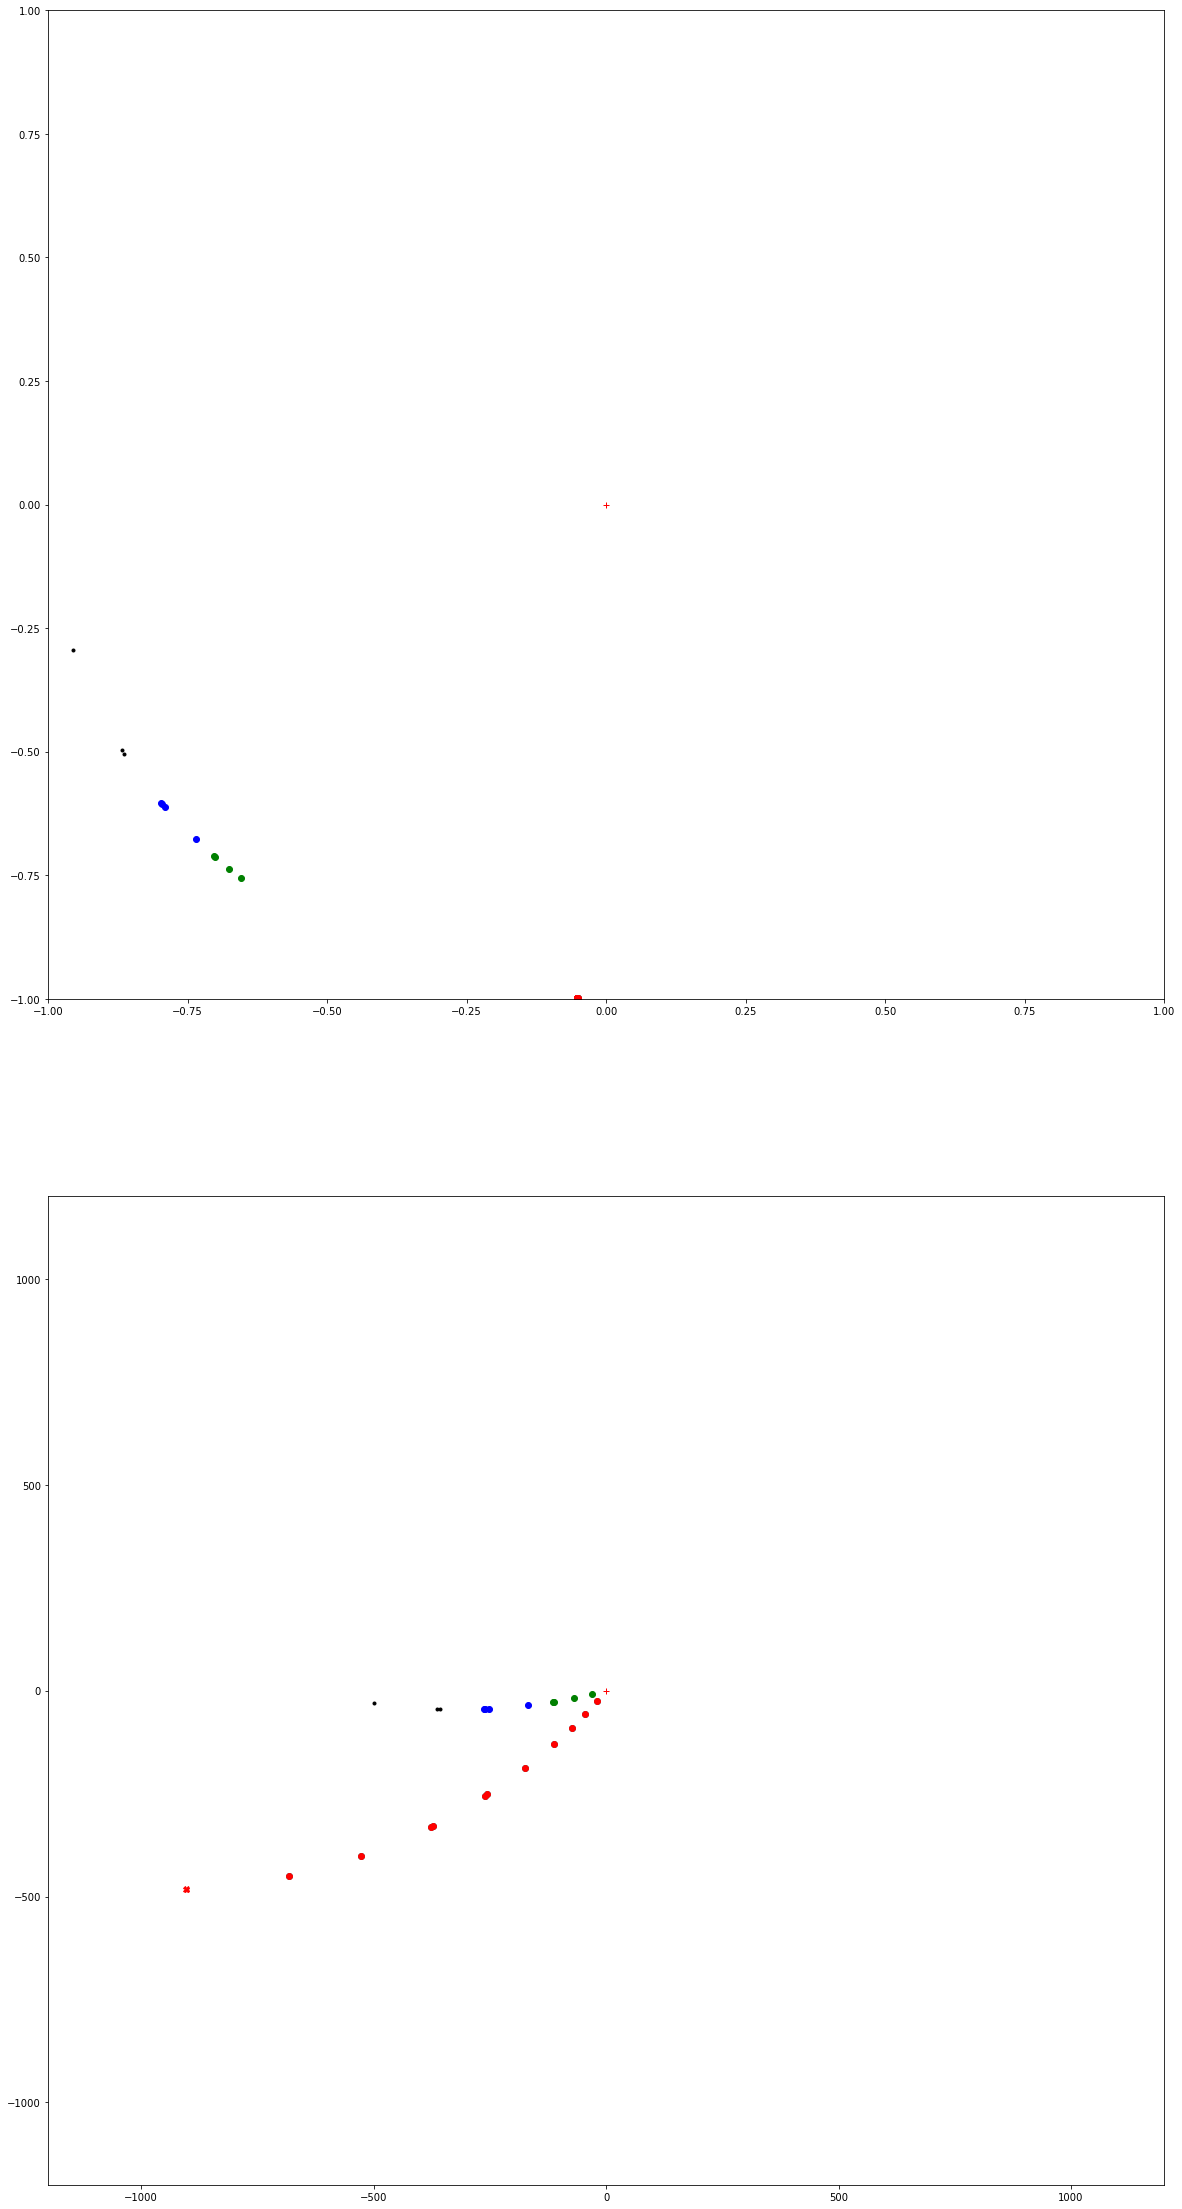

[-1200, 1200, -1200, 1200]

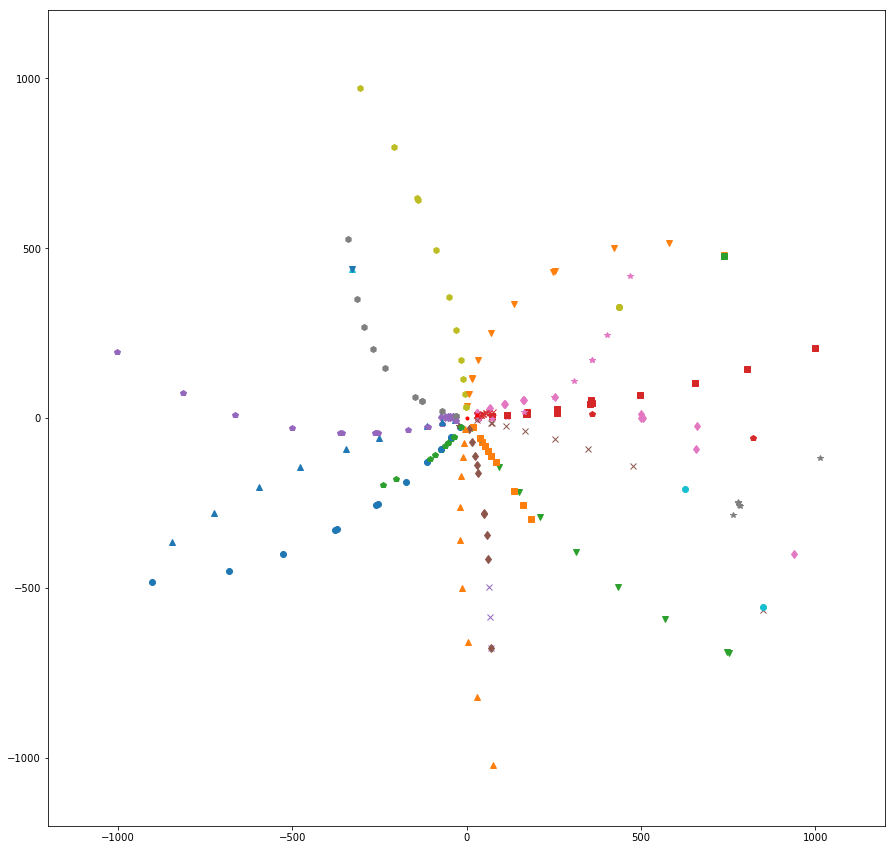

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
plt.figure(figsize = (20,20))

data.sort(key = lambda pt: -math.sqrt(pt[0]**2 + pt[1]**2))
maxDist = math.sqrt(data[0][0]**2 + data[0][1]**2)

zThreshold = 1
cutoff = 1

#TODO change to hits
visited = [False for i in range(len(data))]
clusters = [-1 for i in range(len(data))]
numClusters = 0

#clusters = {1: [(2,3,4), (5,6,8)], 2: [(1,3,4), (7,8)], 3: [(1,2), (5,7)], 6: [(1,5)]}
# change this to hits when submitting #TODO
for i in range(len(data)):
    if visited[i]:
        continue
    toScan = []
    scanIndices = []
    
    xi, yi, zi = data[i]
    rix, riy, riz = rotors[i]
    
    bearing = math.atan2(yi, xi)
    iDist = math.sqrt(xi**2 + yi**2)
    # TODO
    for j in range(len(data)):
        if visited[j]:
            continue
        xj, yj, zj = data[j]
        rjx, rjy, rjz = rotors[j]

        #TODO Undo, testing purposes
        if abs(rjz - riz) > zThreshold or xi*xj + yi*yj < 0 or i == j:
        #if xi*xj + yi*yj < 0 or i == j:
            continue

        jDist = math.sqrt(xj**2 + yj**2)
        ijDist = math.sqrt((xj - xi)**2 + (yj - yi)**2)
        subtendedAngle = math.acos((jDist**2 + ijDist**2 - iDist**2)/(2 * jDist * ijDist))

        jcloser = False
        if subtendedAngle > math.pi/2: #Means j lies closer to the origin (on the circle) than i
            jcloser = True
            subtendedAngle = math.pi - subtendedAngle

        if abs(subtendedAngle) < cutoff:
            crossProductSign = 1 if xi * yj - xj * yi > 0 else -1
            if jcloser:
                crossProductSign = -crossProductSign

            sugAngle = bearing + crossProductSign * subtendedAngle

            toScan.append((math.sin(sugAngle), math.cos(sugAngle), rjz))
            scanIndices.append(j)
    #if i < 40 and i%10 == 0:
    #    plt.subplot(4,1,int(i/10)+1)
    #    plt.plot([y for x,y,z in toScan], [x for x,y,z in toScan], 'b.')
    #if i == 40:
    #    plt.show()
    #print(i, len(toScan))
        
    nBuckets = 50
    buckets = [0 for q in range(nBuckets)]
    bucketScores = [0 for q in range(nBuckets)]
    for f in range(len(toScan)):
        x,y,z = toScan[f]
        index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
        #if index == 286:
            #print("!!!!")
        #print(math.atan2(y,x))
        buckets[index] += 1
        bucketScores[index] += 0.5 + (math.sqrt(data[scanIndices[f]][0]**2 + data[scanIndices[f]][1]**2))/maxDist
        buckets[index - 1] += 1
        bucketScores[index - 1] += 0.5 + (math.sqrt(data[scanIndices[f]][0]**2 + data[scanIndices[f]][1]**2))/maxDist
    #print([(buckets[i], bucketScores[i]) for i in range(nBuckets)])
    mainTrack = bucketScores.index(max(bucketScores))
    #print(mainTrack, max(bucketScores))
    
    if i == 0:
        plt.figure(figsize = (20,40))
        plt.subplot(2,1,1)
        #plt.plot([x for x,y,z in toScan], [y for x,y,z in toScan], 'k.')
        colours = ['b', 'g', 'c', 'm', 'y', 'k']
        c = 0
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if buckets[index] >= 7 or buckets[index-1] >= 7:
                plt.plot([toScan[f][0]], [toScan[f][1]], colours[int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))%5] + 'o')
            else:
                plt.plot([toScan[f][0]], [toScan[f][1]], 'k.')
            c += 1
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if index == mainTrack or index == mainTrack+1:
                #print("!!!")
                plt.plot([toScan[f][0]], [toScan[f][1]], 'ro')
        plt.plot([0], [0], 'r+')
        plt.axis([-1,1,-1,1])
        plt.subplot(2,1,2)
        #plt.plot([data[m][0] for m in scanIndices], [data[m][1] for m in scanIndices], 'k.')
        colours = ['b', 'g', 'c', 'm', 'y', 'k']
        c = 0
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            if buckets[index] >= 7 or buckets[index-1] >= 7:
                plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], colours[int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))%5] + 'o')
            else:
                plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], 'k.')
            c += 1
        for f in range(len(toScan)):
            x,y,z = toScan[f]
            index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
            #print(index)
            if index == mainTrack or index == mainTrack+1:
                plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], 'ro')
        plt.plot([data[i][0]], [data[i][1]], 'rX')
        plt.plot([0], [0], 'r+')
        plt.axis([-1200,1200,-1200,1200])
        plt.show()
    
    for f in range(len(toScan)):
        x,y,z = toScan[f]
        index = int(nBuckets*(math.atan2(y,x)+math.pi)/(2*math.pi))
        #print(index)
        if index == mainTrack or index == mainTrack+1:
            visited[scanIndices[f]] = True
            clusters[scanIndices[f]] = numClusters
    
    visited[i] = True
    clusters[i] = numClusters
    
    numClusters += 1
    '''
    groups = clusterer.scan(toScan)
    groups = list(groups)
    #print(scanIndices)
    #print(groups)
    bestGroup = 0
    for k in range(max(groups)+1):
        if groups.count(k) > bestGroup:
            bestGroup = k
    
    group = [i]
    for j in range(len(groups)):
        if groups[j] == bestGroup:
            group.append(scanIndices[j])
            #visited[scanIndices[j]] = True
    clusters.append(group)
    
    iClusters = []
    for group in range(max(groups) + 1):
        cluster = []
        for hit in range(len(groups)):
            if groups[hit] == group:
                cluster.append(scanIndices[hit])
        iClusters.append(cluster)
    
    plt.figure(figsize = (20,40))
    plt.subplot(2,1,1)
    #plt.plot([x for x,y,z in toScan], [y for x,y,z in toScan], 'k.')
    colours = ['b', 'g', 'c', 'm', 'y', 'k']
    c = 0
    for f in range(len(toScan)):
        plt.plot([toScan[f][0]], [toScan[f][1]], colours[groups[f]%5] + '.')
        c += 1
    plt.plot([0], [0], 'r.')
    plt.axis([-1,1,-1,1])
    plt.subplot(2,1,2)
    #plt.plot([data[m][0] for m in scanIndices], [data[m][1] for m in scanIndices], 'k.')
    colours = ['b', 'g', 'c', 'm', 'y', 'k']
    c = 0
    for f in range(len(toScan)):
        plt.plot([data[scanIndices[f]][0]], [data[scanIndices[f]][1]], colours[groups[f]%5] + '.')
        c += 1
    plt.plot([data[i][0]], [data[i][1]], 'r.')
    plt.plot([0], [0], 'r.')
    plt.axis([-1200,1200,-1200,1200])
    plt.show()

    #print(iClusters)
    
    #clusters[i] = iClusters
    '''
plt.figure(figsize = (15,15))
colours = ['b', 'g', 'c', 'm', 'y', 'k']
shapes = ['o', '^', 'v', 's', 'p', 'x', 'd', '*', 'h']
for i in range(len(data)):
    if clusters[i] != -1:
        plt.plot(data[i][0],
                 data[i][1],
                 'C' + str(clusters[i]%10) + shapes[clusters[i]%9])
    else:
        plt.plot(data[i][0],
                 data[i][1],
                 'k.')
plt.plot([data[i][0]], [data[i][1]], 'r.')
plt.plot([0], [0], 'r.')
plt.axis([-1200,1200,-1200,1200])